In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install colorama
import os
import pickle
import shutil
from PIL import Image
import numpy as np
import cv2
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
# Install conda on Google Colab

# !pip install -q condacolab
# import condacolab
# condacolab.install()

# !conda install conda-pack
# !conda install -c conda-forge conda-pack

1.5.3


In [ ]:
# !pip uninstall pandas

In [ ]:
# !pip install pandas==1.3.5

In [ ]:
# os.chdir('/content/drive/MyDrive/project')
# !git clone https://github.com/EgovisionPolito/mldl23-ego.git

In [ ]:
# import shutil
# shutil.rmtree('/content/ek_data/frames')

#1 setup env

In [3]:
%%time

if  not os.path.isfile('/content/egovision.tar.gz'):
  os.chdir('/content/drive/MyDrive/project')
  # %cp -r '/content/drive/MyDrive/project/egovision.tar.gz'  '/content'
  !rsync -aP '/content/drive/MyDrive/project/egovision.tar.gz'  '/content'
else:
  print('tar file already exist')

try:
  shutil.rmtree('/content/my_env')
except:
  pass

if not os.path.exists('/content/my_env'):
  os.chdir('/content')
  !mkdir -p my_env


if not os.path.exists('/content/my_env/bin'):
  print('')
  !tar -xzf egovision.tar.gz -C my_env

sending incremental file list
egovision.tar.gz
  3,381,904,417 100%   54.62MB/s    0:00:59 (xfr#1, to-chk=0/1)

CPU times: user 1.03 s, sys: 142 ms, total: 1.17 s
Wall time: 2min 37s


In [4]:
%%bash

source my_env/bin/activate

which ipython



/content/my_env/bin/ipython


In [5]:
os.chdir('/content/drive/MyDrive/project/mldl23-ego')

In [6]:
%%bash
/content/my_env/bin/python  -m pip install colorama

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)


In [7]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# 2. data

In [ ]:
# os.chdir('/content/drive/MyDrive/DATA_p01_p08_p22/unzip_data')
# !unzip -q '/content/drive/MyDrive/DATA_p01_p08_p22/P01.zip'
# !unzip -q '/content/drive/MyDrive/OneDrive_2023-05-18.zip'  -d '/content/drive/MyDrive/project/annotation'


# os.chdir('/content/drive/MyDrive/project/mldl23-ego/saved_models')
# !unzip -q checkpoints.zip
# !zip -FF checkpoints.zip --out RepairedZip.zip
# !unzip -q  '/content/drive/MyDrive/checkpoints.zip' -d '/content/drive/MyDrive/project/mldl23-ego/saved_models'

In [ ]:
# !rsync -aP '/content/drive/MyDrive/project/ek_data/frames' '/content'

In [ ]:
# import pandas as pd
# from colorama import Fore, Back, Style
# uid = {}
# for i in  range(3):
#   path_train = '/content/drive/MyDrive/project/mldl23-ego/saved_features/D{}_train_video_info.csv'.format(i+1)
#   path_test = '/content/drive/MyDrive/project/mldl23-ego/saved_features/D{}_test_video_info.csv'.format(i+1)
#   df_train = pd.read_csv(path_train)
#   df_test = pd.read_csv(path_test)
#   uid ['D'+str(i+1)] = set(df_train['uid'])

#   print(Fore.RED +'In D{} dataset :'.format(i+1),Fore.BLACK)
#   print('total uid : {} , unique uid :{}'.format(len(df_train['uid']),len(uid ['D'+str(i+1)])))
#   print('Total train video: {} total test video: {}'.format(df_train.shape[0],df_test.shape[0]))
#   print('video with less frames than 25, in train: {}, in test: {} '.format(df_train[df_train['num_frames']<25].shape[0],df_test[df_test['num_frames']<25].shape[0]))
#   print('video with less frames than 50, in train: {}, in test: {} '.format(df_train[df_train['num_frames']<50].shape[0],df_test[df_test['num_frames']<50].shape[0]))
#   print('video with less frames than 125, in train: {}, in test: {} '.format(df_train[df_train['num_frames']<125].shape[0],df_test[df_test['num_frames']<125].shape[0]))





In D1 dataset : 
total uid : 1543 , unique uid :1543
Total train video: 1543 total test video: 435
video with less frames than 25, in train: 0, in test: 0 
video with less frames than 50, in train: 66, in test: 15 
video with less frames than 125, in train: 774, in test: 211 
In D2 dataset : 
total uid : 2495 , unique uid :2495
Total train video: 2495 total test video: 750
video with less frames than 25, in train: 0, in test: 0 
video with less frames than 50, in train: 315, in test: 116 
video with less frames than 125, in train: 1482, in test: 468 
In D3 dataset : 
total uid : 3897 , unique uid :3897
Total train video: 3897 total test video: 974
video with less frames than 25, in train: 0, in test: 0 
video with less frames than 50, in train: 718, in test: 179 
video with less frames than 125, in train: 2753, in test: 664 


## 2.1 fixing missed data

In [ ]:
# import pandas as pd
# df2 = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/saved_features/D1_alaki_D1_train.pkl')
# uids  = [df2['features'][i]['uid'] for i in range(len(df2['features']))]

# print(len(uids))
# print(len(set(uids)))

857
360


In [ ]:
import pandas as pd
from colorama import Fore
A = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/train_val/D3_test.pkl')
# A['address'] = '/content/drive/MyDrive/project/ek_data/frames/'+A['video_id']

# import time
# from tqdm import tqdm
# from PIL import Image
# tt = time.time()
# for index, row in (A.iterrows()):

#   strat =  row['start_frame']
#   end  =  row['stop_frame']
#   print(index,'/',A.shape[0],'   ',strat,'   ',end,'   ', time.time()-tt )
#   for i in (range(strat,strat+2)):
#      tem = '/img_'
#      try:
#        for j in range(10-len(str(i))):

#             tem +=str(0)
#        tem+=str(i)+'.jpg'
#        add = row['address']+tem
#        Image.open(add )
#      except Exception as e:
#           print(Fore.RED ,e,Fore.BLACK)


A['participant_id'].unique()

array(['P22'], dtype=object)

## 2.2 Unrar data

In [ ]:
os.chdir('/content')

In [ ]:
%%bash


# Untar
for file in /content/drive/MyDrive/shahin/P01/*.tar.gz; do
  fn=$(basename $file)
  fn=${fn/.tar.gz/}
  ls -lah $file
  mkdir -p ek_data/frames/$fn
  tar xf $file --directory=ek_data/frames/$fn
  echo =============================
done

-rw------- 1 root root 1.1G Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_01.tar.gz
-rw------- 1 root root 390M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_02.tar.gz
-rw------- 1 root root 44M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_03.tar.gz
-rw------- 1 root root 45M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_04.tar.gz
-rw------- 1 root root 420M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_05.tar.gz
-rw------- 1 root root 361M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_06.tar.gz
-rw------- 1 root root 87M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_07.tar.gz
-rw------- 1 root root 57M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_08.tar.gz
-rw------- 1 root root 1.7G Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_09.tar.gz
-rw------- 1 root root 90M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_10.tar.gz
-rw------- 1 root root 355M Apr 19  2023 /content/drive/MyDrive/shahin/P01/P01_11.tar.gz
-rw------- 1 root root 88M

##2.3 action net

### 2.3.1 downloading video

In [ ]:
# !wget 'https://data.csail.mit.edu/ActionNet/wearable_data/2022-06-14_experiment_S04/2022-06-14_16-38-18_actionNet-wearables_S04/2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4'

--2023-09-07 20:15:57--  https://data.csail.mit.edu/ActionNet/wearable_data/2022-06-14_experiment_S04/2022-06-14_16-38-18_actionNet-wearables_S04/2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.131.233
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20656385361 (19G) [video/mp4]
Saving to: ‘2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4’

2022-06-14_16-38-43 100%[===================>]  19.24G  81.7MB/s    in 4m 19s  

2023-09-07 20:20:17 (75.9 MB/s) - ‘2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4’ saved [20656385361/20656385361]



### 2.3.2 extracting information

In [ ]:

# video fram rate
video = cv2.VideoCapture("/content/2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4");

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
fps = video.get(cv2.CAP_PROP_FPS)
width  =video.get(3)   # float `width`
height =video.get(4)  # float `height`
# or
print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
print('video width: {}  and video height: {}'.format(width,height))
totalNoFrames = video.get(cv2.CAP_PROP_FRAME_COUNT)
durationInSeconds = totalNoFrames // fps
print('total number of frames :{}'.format(totalNoFrames))
print("Video Duration In Seconds:", durationInSeconds, "s")
video.release()


Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 29.669551601030665
video width: 1280.0  and video height: 720.0
total number of frames :108770.0
Video Duration In Seconds: 3666.0 s


In [ ]:
#finidng the size of other pictures
list_of_files = os.listdir('/content/drive/MyDrive/project/ek_data/frames/P01_03')
im = Image.open(os.path.join('/content/drive/MyDrive/project/ek_data/frames/P01_03',list_of_files[12]))
width, height = im.size
print(width, height)
print(list_of_files[0])

456 256
img_0000001047.jpg


### 2.3.3 splitting video to images

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
cap = cv2.VideoCapture('/content/2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4')
base = '/content/S04'
tmpl= "img_{:010d}.jpg"
n=0
import time
start = time.time()
while True:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (width, height))
        if ret:
            path = os.path.join(base,tmpl.format(n))
            cv2.imwrite(path, frame)
            n += 1
            if n%1000==0:
               print(n ,'   time:{}'.format(time.time()-start))
        else:
          break

<IPython.core.display.Javascript object>

1000    time:13.486366033554077
2000    time:30.35879921913147
3000    time:47.393553495407104
4000    time:64.31649684906006
5000    time:87.33134722709656
6000    time:105.26420068740845
7000    time:121.97168040275574
8000    time:139.3212423324585
9000    time:156.3683638572693
10000    time:173.02639174461365
11000    time:190.99704337120056
12000    time:204.625470161438
13000    time:220.25086450576782
14000    time:234.0534861087799
15000    time:247.51030921936035
16000    time:260.84073138237
17000    time:274.64822721481323
18000    time:288.3056814670563
19000    time:301.73169898986816
20000    time:315.30403542518616
21000    time:329.01887798309326
22000    time:342.80702900886536
23000    time:356.3390736579895
24000    time:369.5110733509064
25000    time:383.2843885421753
26000    time:396.86184000968933
27000    time:410.64005970954895
28000    time:423.96076941490173
29000    time:437.591680765152
30000    time:451.2019398212433
31000    time:465.10731625556946
3200

error: ignored

### 2.3.4 taring and copying splitted imges

In [ ]:
%%bash
#  tar -czvf S04.tar.gz S04

In [ ]:
# !rsync -aP '/content/S04.tar.gz'  '/content/drive/MyDrive/Actionnet'

sending incremental file list
S04.tar.gz
  4,895,522,101 100%   82.99MB/s    0:00:56 (xfr#1, to-chk=0/1)


### 2.3.5 extracting data

In [ ]:
os.chdir('/content')

In [ ]:
%%bash
# Untar
for file in /content/drive/MyDrive/Actionnet/*.tar.gz; do
  fn=$(basename $file)
  fn=${fn/.tar.gz/}
  ls -lah $file
  mkdir -p ek_data/frames/
  tar xf $file --directory=ek_data/frames
  echo =============================
done

-rw------- 1 root root 0 Sep 24 19:19 /content/drive/MyDrive/Actionnet/Actionent.tar.gz
-rw------- 1 root root 4.6G Sep  7 21:51 /content/drive/MyDrive/Actionnet/S04.tar.gz


tar: This does not look like a tar archive

gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now


### 2.3.6 create appropriate pkl file

In [ ]:
A = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/train_val/D1_test.pkl')
print(A.shape)
A.head()
# We should create a pkl file with the same structure for s04

(435, 10)


,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class
0,13744,P08,P08_09,get mocha pot,00:00:02.61,00:00:03.61,156,216,get,0
1,13747,P08,P08_09,clean mocha,00:00:09.66,00:00:10.16,579,609,clean,4
2,13748,P08,P08_09,pour water,00:00:10.26,00:00:12.19,615,731,pour,7
3,13749,P08,P08_09,get filter,00:00:14.11,00:00:15.61,846,936,get,0
4,13751,P08,P08_09,clean coffee filter,00:00:19.63,00:00:28.67,1177,1720,clean,4


In [ ]:
A = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/action-net/ActionNet_test.pkl')
print(A.shape)
print(len(set(A['labels'])))
print(A[A['file']=='S04_1.pkl'].shape)
A[A['file']=='S04_1.pkl']


(59, 4)
12
(8, 4)


,index,file,description,labels
34,34,S04_1.pkl,Open/close a jar of almond butter,Open/Close
23,23,S04_1.pkl,Clear cutting board,Clear
26,26,S04_1.pkl,Spread almond butter on a bread slice,Spread
56,56,S04_1.pkl,"Set table: 3 each large/small plates, bowls, m...",Set
45,45,S04_1.pkl,Clean a plate with a towel,Clean
52,52,S04_1.pkl,Clean a pan with a towel,Clean
36,36,S04_1.pkl,Pour water from a pitcher into a glass,Pour
47,47,S04_1.pkl,Clean a plate with a towel,Clean


In [ ]:
import pickle
import pickletools
s = pickle.dumps('/content/drive/MyDrive/project/mldl23-ego/train_val/D1_test.pkl')
proto_op = next(pickletools.genops(s))
assert proto_op[0].name == 'PROTO'
proto_ver = proto_op[1]
proto_ver


4

In [ ]:
B =  pd.read_pickle('/content/drive/MyDrive/project/annotation/ActionNet Annotations/S04_1.pkl')
print(B.shape)
print(B['stop'][0]-B['start'][0])
print(' data duration :{} s '.format(B['stop'][1:].max()-B['start'][1:].min()))
video_duration= B['stop']-B['start']
labesls = list(set(B['description']))
print(len(labesls ))
print(labesls[0:5])
print(labesls[5:10])
print(labesls[10:15])
print(labesls[15:])
print(B['myo_left_timestamps'][1].shape)
B.head(5)


(60, 7)
860.2357132434845
 data duration :2525.4816496372223 s 
21
['Clean a pan with a sponge', 'Spread almond butter on a bread slice', 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'calibration', 'Get/replace items from refrigerator/cabinets/drawers']
['Slice a potato', 'Stack on table: 3 each large/small plates, bowls', 'Peel a potato', 'Slice bread', 'Clean a plate with a towel']
['Clean a pan with a towel', 'Pour water from a pitcher into a glass', 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Slice a cucumber', 'Open/close a jar of almond butter']
['Spread jelly on a bread slice', 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Peel a cucumber', 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Clean a plate with a sponge', 'Clear cutting board']
(12167,)


,description,start,stop,myo_left_timestamps,myo_left_readings,myo_right_timestamps,myo_right_readings
0,calibration,1.655239e+09,1.655240e+09,[],[],[],[]
1,Get/replace items from refrigerator/cabinets/d...,1.655240e+09,1.655240e+09,"[1655239974.420555, 1655239974.432055, 1655239...","[[8, 7, 2, 2, 6, 5, 14, 2], [-4, 23, 19, 6, 16...","[1655239974.4195595, 1655239974.427058, 165523...","[[-2, -3, 2, 3, -8, -1, 1, -2], [3, 7, 8, -1, ..."
2,Peel a cucumber,1.655240e+09,1.655240e+09,"[1655240064.7444172, 1655240064.748419, 165524...","[[78, 57, 43, 7, 18, 18, 4, 16], [3, 0, 48, 6,...","[1655240064.7504191, 1655240064.76542, 1655240...","[[-18, 14, 26, -3, -15, -12, -26, 4], [-20, -2..."
3,Peel a cucumber,1.655240e+09,1.655240e+09,"[1655240130.5200577, 1655240130.531557, 165524...","[[-30, 20, 18, 1, 12, 23, 21, -10], [23, -15, ...","[1655240130.5190585, 1655240130.526558, 165524...","[[1, -21, 22, 14, 13, -24, -1, -12], [-58, -83..."
4,Peel a cucumber,1.655240e+09,1.655240e+09,"[1655240178.033217, 1655240178.037216, 1655240...","[[4, -19, -26, -63, -31, -36, -3, -1], [-30, -...","[1655240178.0472164, 1655240178.062216, 165524...","[[-4, 57, 49, 32, 34, 7, 7, 7], [-13, -80, -29..."


In [ ]:
B2=B[0:1]
clips_dessired_length = 4
index_b2 = 0
for index, row in B.iterrows():
  if index %10 ==0:
    print(index)


  if index !=0:
    this_clip_duration =row['stop'] - row['start']
    for j in range(int(this_clip_duration//clips_dessired_length)):
       index_b2+=1
       start_clip =  row['start'] +clips_dessired_length*j
       end_clip =    row['start'] +clips_dessired_length*(j+1)


       B2.at[index_b2,'start']  = start_clip
       B2.at[index_b2,'stop']   = end_clip
       B2.at[index_b2,'description'] =  row['description']

       accepted_righ_myo_index = np.where(np.logical_and(row['myo_right_timestamps']>=start_clip, row['myo_right_timestamps']<=end_clip))
       B2.at[index_b2,'myo_right_timestamps'] = row['myo_right_timestamps'][accepted_righ_myo_index]
       B2.at[index_b2,'myo_right_readings'] = row['myo_right_readings'][accepted_righ_myo_index]

       accepted_left_myo_index = np.where(np.logical_and(row['myo_left_timestamps']>=start_clip, row['myo_left_timestamps']<=end_clip))
       B2.at[index_b2,'myo_left_timestamps'] = row['myo_left_timestamps'][accepted_left_myo_index]
       B2.at[index_b2,'myo_left_readings'] = row['myo_left_readings'][accepted_left_myo_index]
       if len(row['myo_left_readings'][accepted_left_myo_index])==0:
        print('sth is wrong')
B=B2
print(B.shape)
B.head()


0
10


/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


20
30
40
50
(458, 7)


,description,start,stop,myo_left_timestamps,myo_left_readings,myo_right_timestamps,myo_right_readings
0,calibration,1.655239e+09,1.655240e+09,[],[],[],[]
1,Get/replace items from refrigerator/cabinets/d...,1.655240e+09,1.655240e+09,"[1655239974.420555, 1655239974.432055, 1655239...","[[8, 7, 2, 2, 6, 5, 14, 2], [-4, 23, 19, 6, 16...","[1655239974.4195595, 1655239974.427058, 165523...","[[-2, -3, 2, 3, -8, -1, 1, -2], [3, 7, 8, -1, ..."
2,Get/replace items from refrigerator/cabinets/d...,1.655240e+09,1.655240e+09,"[1655239978.421559, 1655239978.4255567, 165523...","[[11, 2, 23, -24, 9, 9, 3, 9], [7, -4, -14, -1...","[1655239978.4205585, 1655239978.424558, 165523...","[[1, 2, 2, 0, -4, -30, -10, -1], [1, -6, -1, 6..."
3,Get/replace items from refrigerator/cabinets/d...,1.655240e+09,1.655240e+09,"[1655239982.419547, 1655239982.4270475, 165523...","[[-4, -9, -12, -4, 15, 1, -3, -4], [-3, -22, -...","[1655239982.422051, 1655239982.429552, 1655239...","[[7, -4, -5, -12, -12, -26, -3, 1], [-12, -6, ..."
4,Get/replace items from refrigerator/cabinets/d...,1.655240e+09,1.655240e+09,"[1655239986.435544, 1655239986.454542, 1655239...","[[3, -38, 10, 6, 12, 6, 3, 7], [3, 31, -8, -5,...","[1655239986.4195414, 1655239986.426542, 165523...","[[-11, -26, -40, -1, -16, -10, -50, -10], [-7,..."


In [ ]:
B[['start','stop']] = B[['start','stop']]- B['start'][0]
B['video_id'] = 'S04_1'
B['participant_id']= 'S04'
B['narration'] = B['description']
B.drop(columns=['description'],inplace=True)
B['uid'] =''
B['start_timestamp'] =''
B['stop_timestamp'] =''
B['start_frame'] = ''
B['stop_frame'] =''
B['verb'] =''
B['verb_class'] = ''
Labels =list(set(A['labels']))

In [ ]:
def time_format( seconds):

  seconds= seconds % (24 * 3600)
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60
  return("%02d:%02d:%02d:%02d" % (0,hour, minutes, seconds))

def frame_rate(time,frame_rate= 29.669551601030665 ):
    frame = round(time*frame_rate)


    return(frame)



In [ ]:
for index, row in B.iterrows():
   B.at[index,'uid'] = index
   B.at[index,'start_timestamp'] = time_format(row['start'])
   B.at[index,'stop_timestamp'] = time_format(row['stop'])
   B.at[index,'start_frame'] =frame_rate(row['start'])
   B.at[index,'stop_frame'] =frame_rate(row['stop'])
   narr = row['narration'].split('/')
   narr  =' '.join(narr)
   narr =narr.split(' ')
   narr = [narr[i].lower()  for i in range(len(narr))]
  #  print('*********',narr)
   for tem in Labels:
    # print(tem)
    tem2 = tem.split('/')
    tem2 = [tem2[i].lower()  for i in range(len(tem2))]
    # print(tem2)
    for ver in tem2:
      if ver in narr:
        B.at[index,'verb'] = tem
        B.at[index,'verb_class'] = Labels.index(tem)
        LLL =True

B=B[1:]
B.head()

,start,stop,myo_left_timestamps,myo_left_readings,myo_right_timestamps,myo_right_readings,video_id,participant_id,narration,uid,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class
1,860.235713,864.235713,"[1655239974.420555, 1655239974.432055, 1655239...","[[8, 7, 2, 2, 6, 5, 14, 2], [-4, 23, 19, 6, 16...","[1655239974.4195595, 1655239974.427058, 165523...","[[-2, -3, 2, 3, -8, -1, 1, -2], [3, 7, 8, -1, ...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,1,00:00:14:20,00:00:14:24,25523,25641,Get/Put,8
2,864.235713,868.235713,"[1655239978.421559, 1655239978.4255567, 165523...","[[11, 2, 23, -24, 9, 9, 3, 9], [7, -4, -14, -1...","[1655239978.4205585, 1655239978.424558, 165523...","[[1, 2, 2, 0, -4, -30, -10, -1], [1, -6, -1, 6...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,2,00:00:14:24,00:00:14:28,25641,25760,Get/Put,8
3,868.235713,872.235713,"[1655239982.419547, 1655239982.4270475, 165523...","[[-4, -9, -12, -4, 15, 1, -3, -4], [-3, -22, -...","[1655239982.422051, 1655239982.429552, 1655239...","[[7, -4, -5, -12, -12, -26, -3, 1], [-12, -6, ...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,3,00:00:14:28,00:00:14:32,25760,25879,Get/Put,8
4,872.235713,876.235713,"[1655239986.435544, 1655239986.454542, 1655239...","[[3, -38, 10, 6, 12, 6, 3, 7], [3, 31, -8, -5,...","[1655239986.4195414, 1655239986.426542, 165523...","[[-11, -26, -40, -1, -16, -10, -50, -10], [-7,...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,4,00:00:14:32,00:00:14:36,25879,25998,Get/Put,8
5,876.235713,880.235713,"[1655239990.422035, 1655239990.429535, 1655239...","[[-18, -3, 4, -1, -3, -2, 2, -4], [-7, 34, 17,...","[1655239990.424534, 1655239990.4395351, 165523...","[[-24, -5, -17, -8, -26, -15, -3, -12], [17, 2...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,5,00:00:14:36,00:00:14:40,25998,26116,Get/Put,8


In [ ]:
len(set(B['verb']))

11

### saving

In [ ]:
B.to_pickle("/content/drive/MyDrive/project/mldl23-ego/train_val/S4_train.pkl",protocol=4)

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/train_val/S4_train.pkl')
print(df.shape)
df.head()

(457, 16)


,start,stop,myo_left_timestamps,myo_left_readings,myo_right_timestamps,myo_right_readings,video_id,participant_id,narration,uid,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class
1,860.235713,864.235713,"[1655239974.420555, 1655239974.432055, 1655239...","[[8, 7, 2, 2, 6, 5, 14, 2], [-4, 23, 19, 6, 16...","[1655239974.4195595, 1655239974.427058, 165523...","[[-2, -3, 2, 3, -8, -1, 1, -2], [3, 7, 8, -1, ...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,1,00:00:14:20,00:00:14:24,25523,25641,Get/Put,8
2,864.235713,868.235713,"[1655239978.421559, 1655239978.4255567, 165523...","[[11, 2, 23, -24, 9, 9, 3, 9], [7, -4, -14, -1...","[1655239978.4205585, 1655239978.424558, 165523...","[[1, 2, 2, 0, -4, -30, -10, -1], [1, -6, -1, 6...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,2,00:00:14:24,00:00:14:28,25641,25760,Get/Put,8
3,868.235713,872.235713,"[1655239982.419547, 1655239982.4270475, 165523...","[[-4, -9, -12, -4, 15, 1, -3, -4], [-3, -22, -...","[1655239982.422051, 1655239982.429552, 1655239...","[[7, -4, -5, -12, -12, -26, -3, 1], [-12, -6, ...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,3,00:00:14:28,00:00:14:32,25760,25879,Get/Put,8
4,872.235713,876.235713,"[1655239986.435544, 1655239986.454542, 1655239...","[[3, -38, 10, 6, 12, 6, 3, 7], [3, 31, -8, -5,...","[1655239986.4195414, 1655239986.426542, 165523...","[[-11, -26, -40, -1, -16, -10, -50, -10], [-7,...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,4,00:00:14:32,00:00:14:36,25879,25998,Get/Put,8
5,876.235713,880.235713,"[1655239990.422035, 1655239990.429535, 1655239...","[[-18, -3, 4, -1, -3, -2, 2, -4], [-7, 34, 17,...","[1655239990.424534, 1655239990.4395351, 165523...","[[-24, -5, -17, -8, -26, -15, -3, -12], [17, 2...",S04_1,S04,Get/replace items from refrigerator/cabinets/d...,5,00:00:14:36,00:00:14:40,25998,26116,Get/Put,8


### 2.3.7 checking frames

In [ ]:
check_item = 58
start= df['start_frame'][check_item]
stop = df['stop_frame'][check_item]
print('narration : ',df['narration'][check_item])
print('verb : ',df['verb'][check_item])
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
num1 = random.sample(range(start,stop), 10)
tmpl= "img_{:010d}.jpg"

fig, axs = plt.subplots(1,10,figsize=(40,10))
plt.tight_layout()
index =1
for c in num1:
  img_add = os.path.join('/content/ek_data/frames/S04', tmpl.format(c) )
  img = cv2.imread( img_add)
  plt.subplot(2,5, index)
  index+=1
  plt.imshow(img, cmap="gray",interpolation='none')

Output hidden; open in https://colab.research.google.com to view.

# 3. runs

In [8]:
os.chdir('/content/drive/MyDrive/project/mldl23-ego')

## 3.1 D1 uniform




### 3.1.1 test


In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform1_16 \
  split=test\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD1 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1\
  train.num_clips=5\
  test.num_clips=5\
  train.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  save.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path=  /content/ek_data/frames

2023-11-26 08:43:31 LOG INFO Feature Extraction
2023-11-26 08:43:31 LOG INFO Running with parameters: 
  action: save
  name: Uniform1_16
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D1-D1.log
  models_dir: saved_models/Uniform1_16/Nov26_08-43-27
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 1
    stride: 1
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
     

### 3.1.2 train


In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform1_16 \
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD1 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1\
  train.num_clips=5\
  test.num_clips=5\
  train.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  save.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/ek_data/frames

2023-11-26 08:12:48 LOG INFO Feature Extraction
2023-11-26 08:12:48 LOG INFO Running with parameters: 
  action: save
  name: Uniform1_16
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D1-D1.log
  models_dir: saved_models/Uniform1_16/Nov26_08-12-45
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 1
    stride: 1
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
     

## 3.2 D1 dense sanpling

### 3.2.1 test

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Dense1_16 \
  split=test\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD1 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1\
  train.num_clips=5\
  test.num_clips=5\
  train.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  save.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=True\
  dataset.RGB.data_path=  /content/ek_data/frames

2023-11-26 08:59:22 LOG INFO Feature Extraction
2023-11-26 08:59:23 LOG INFO Running with parameters: 
  action: save
  name: Dense1_16
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D1-D1.log
  models_dir: saved_models/Dense1_16/Nov26_08-59-20
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 1
    stride: 1
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      res

### 3.2.2 train

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Dense1_16 \
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD1 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1\
  train.num_clips=5\
  test.num_clips=5\
  train.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  save.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=True\
  dataset.RGB.data_path=  /content/ek_data/frames

2023-11-26 09:08:55 LOG INFO Feature Extraction
2023-11-26 09:08:55 LOG INFO Running with parameters: 
  action: save
  name: Dense1_16
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D1-D1.log
  models_dir: saved_models/Dense1_16/Nov26_09-08-53
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 1
    stride: 1
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      res

#3.3 D2

## 3.3.1 D2 uniform

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform2_16 \
  split=test \
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD2 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D2-D2 \
  test.num_clips=5\
  train.num_clips=5\
  save.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  train.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/drive/MyDrive/project/ek_data/frames



 labels:  tensor([0])


2023-11-23 14:33:37 LOG INFO Feature Extraction
2023-11-23 14:33:37 LOG INFO Running with parameters: 
  action: save
  name: Uniform2_16
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D2-D2.log
  models_dir: saved_models/Uniform2_16/Nov23_14-33-30
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D2-D2
    workers: 1
    stride: 1
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
     

## 3.3.2 D2 uniform Train

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform2_16 \
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD2 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D2-D2 \
  test.num_clips=5\
  train.num_clips=5\
  save.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  train.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/drive/MyDrive/project/ek_data/frames

Process is terminated.


## 3.3.4 D2 dense test

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Dense2_10 \
  split=test\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD2 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D2-D2 \
  test.num_clips=5\
  train.num_clips=5\
  save.num_frames_per_clip.RGB=10\
  test.num_frames_per_clip.RGB=10\
  train.num_frames_per_clip.RGB=10\
  save.dense_sampling.RGB=True\
  dataset.RGB.data_path= /content/drive/MyDrive/project/ek_data/frames

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/content/my_env/bin/python: can't open file 'save_feat.py': [Errno 107] Transport endpoint is not connected
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-1219bcc36e1d>", line 1, in <cell line: 1>
    get_ipython().run_cell_magic('bash', '', '\n/content/my_env/bin/python   save_feat.py name=Dense2_10 \\\n  split=test\\\n  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD2 \\\n  config=configs/I3D_save_feat.yaml \\\n  dataset.shift=D2-D2 \\\n  test.num_clips=5\\\n  train.num_clips=5\\\n  save.num_frames_per_clip.RGB=10\\\n  test.num_frames_per_clip.RGB=10\\\n  train.num_frames_per_clip.RGB=10\\\n  save.dense_sampling.RGB=True\\\n  dataset.RGB.data_path= /content/drive/MyDrive/project/ek_data/frames\n')
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_shell.py", line 334, in run_cell_magic
    return super().run_cell_magic(magic_name, line, cell)
  File "/usr/local

##3.3.5 D2 dense train

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Dense2_16\
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD2 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D2-D2 \
  test.num_clips=5\
  train.num_clips=5\
  save.num_frames_per_clip.RGB=16\
  test.num_frames_per_clip.RGB=16\
  train.num_frames_per_clip.RGB=16\
  save.dense_sampling.RGB=True\
  dataset.RGB.data_path= /content/drive/MyDrive/project/ek_data/frames

2023-11-26 19:54:03 LOG INFO Feature Extraction
2023-11-26 19:54:03 LOG INFO Running with parameters: 
  action: save
  name: Dense2_16
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D2-D2.log
  models_dir: saved_models/Dense2_16/Nov26_19-53-57
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D2-D2
    workers: 1
    stride: 1
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      res

#3.3 D3

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Dense3 \
  split=test\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD3 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D3-D3 \
  test.num_clips=5\
  test.num_frames_per_clip.RGB=5\
  save.dense_sampling.RGB=True\
  dataset.RGB.data_path= /content/ek_data/frames



 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([3])


 labels:  tensor([0])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([3])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([3])


 labels:  tensor([1])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([3])


 labels:  tensor([1])


 labels:  tensor([1])


 labels:  tens

2023-10-05 10:29:46 LOG INFO Feature Extraction
2023-10-05 10:29:47 LOG INFO Running with parameters: 
  action: save
  name: Dense3
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D3-D3.log
  models_dir: saved_models/Dense3/Oct05_10-29-44
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 5
  dataset:
    annotations_path: train_val
    shift: D3-D3
    workers: 1
    stride: 2
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      resolution

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Dense3 \
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD3 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D3-D3 \
  test.num_clips=5\
  test.num_frames_per_clip.RGB=5\
  save.dense_sampling.RGB=True\
  dataset.RGB.data_path= /content/ek_data/frames



 labels:  tensor([0])


 labels:  tensor([4])


 labels:  tensor([3])


 labels:  tensor([2])


 labels:  tensor([4])


 labels:  tensor([2])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([2])


 labels:  tensor([1])


 labels:  tensor([2])


 labels:  tensor([4])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([4])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([2])


 labels:  tensor([4])


 labels:  tensor([1])


 labels:  tensor([4])


 labels:  tensor([1])


 labels:  tensor([4])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([1])


 labels:  tensor([0])


 labels:  tensor([4])


 labels:  tensor([1])


 labels:  tensor([2])


 labels:  tensor([4])


 labels:  tens

2023-10-05 11:09:47 LOG INFO Feature Extraction
2023-10-05 11:09:47 LOG INFO Running with parameters: 
  action: save
  name: Dense3
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D3-D3.log
  models_dir: saved_models/Dense3/Oct05_11-09-43
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 5
  dataset:
    annotations_path: train_val
    shift: D3-D3
    workers: 1
    stride: 2
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      resolution

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform3 \
  split=test\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD3 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D3-D3 \
  test.num_clips=5\
  test.num_frames_per_clip.RGB=5\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/ek_data/frames

2023-08-19 20:40:15 LOG INFO Feature Extraction
2023-08-19 20:40:15 LOG INFO Running with parameters: 
  action: save
  name: Uniform3
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D3-D3.log
  models_dir: saved_models/Uniform3/Aug19_20-40-13
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 5
  dataset:
    annotations_path: train_val
    shift: D3-D3
    workers: 1
    stride: 2
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      resolu

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform3 \
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD3 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D3-D3 \
  test.num_clips=5\
  test.num_frames_per_clip.RGB=5\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/ek_data/frames

2023-08-19 19:42:36 LOG INFO Feature Extraction
2023-08-19 19:42:36 LOG INFO Running with parameters: 
  action: save
  name: Uniform3
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D3-D3.log
  models_dir: saved_models/Uniform3/Aug19_19-42-33
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 5
  dataset:
    annotations_path: train_val
    shift: D3-D3
    workers: 1
    stride: 2
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      resolu

### 3.4 Action net


In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform4 \
  split=train\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD3 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=S4-S4 \
  test.num_clips=5\
  test.num_frames_per_clip.RGB=5\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/ek_data/frames



 labels:  tensor([0])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([4])


 labels:  tensor([6])


 labels:  tensor([3])


 labels:  tensor([3])


 labels:  tensor([5])


 labels:  tensor([3])


 labels:  tensor([0])


 labels:  tensor([5])


 labels:  tensor([11])


 labels:  tensor([11])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([8])


 labels:  tensor([6])


 labels:  tensor([8])


 labels:  tensor([5])


 labels:  tensor([0])


 labels:  tensor([0])


 labels:  tensor([9])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([2])


 labels:  tensor([0])


 labels:  tensor([5])


 labels:  tensor([11])


 labels:  tensor([10])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([8])


 labels:  tensor([0])


 labels:  tensor([10])


 labels:  tensor([8])


 label

2023-10-13 09:00:38 LOG INFO Feature Extraction
2023-10-13 09:00:38 LOG INFO Running with parameters: 
  action: save
  name: Uniform4
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_S4-S4.log
  models_dir: saved_models/Uniform4/Oct13_09-00-35
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 5
  dataset:
    annotations_path: train_val
    shift: S4-S4
    workers: 1
    stride: 2
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      resolu

In [ ]:
%%bash

/content/my_env/bin/python   save_feat.py name=Uniform4 \
  split=test\
  resume_from= /content/drive/MyDrive/project/mldl23-ego/saved_models/checkpoints/I3D_SourceOnlyD3 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=S4-S4 \
  test.num_clips=5\
  test.num_frames_per_clip.RGB=5\
  save.dense_sampling.RGB=False\
  dataset.RGB.data_path= /content/ek_data/frames



 labels:  tensor([1])


 labels:  tensor([5])


 labels:  tensor([7])


 labels:  tensor([0])


 labels:  tensor([5])


 labels:  tensor([10])


 labels:  tensor([3])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([10])


 labels:  tensor([8])


 labels:  tensor([0])


 labels:  tensor([3])


 labels:  tensor([10])


 labels:  tensor([9])


 labels:  tensor([6])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([8])


 labels:  tensor([6])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([9])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([0])


 labels:  tensor([6])


 labels:  tensor([11])


 labels:  tensor([9])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([10])


 labels:  tensor([0])


 labels:  tensor([10])


 labels:  tensor([6])


 labels:  tensor([6])


 labels:  tensor([3])


 labels:  tensor([10])


 lab

2023-10-13 08:59:01 LOG INFO Feature Extraction
2023-10-13 08:59:01 LOG INFO Running with parameters: 
  action: save
  name: Uniform4
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_S4-S4.log
  models_dir: saved_models/Uniform4/Oct13_08-58-59
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 5
  dataset:
    annotations_path: train_val
    shift: S4-S4
    workers: 1
    stride: 2
    resolution: 224
    RGB:
      data_path: None
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
      dropout: 0.5
      resolu



---



---



---



---


# Analysing extracted features

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(8)

<ipython-input-5-f28f97646257>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


## D1 with dense sampling

In [ ]:
feat = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/saved_features/first_D1_test.pkl')
# feat = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/saved_features/Dense1_16_D1_train.pkl')
print('number of videos: {}'.format(len((feat['features']))))
print('number of clips per video: {}'.format(len(feat['features'][0]['features_RGB'])))
print('number of features per clip: ',(feat['features'][0]['features_RGB'][0].shape))

mid_clip_feat = np.array([ feat['features'][i]['features_RGB'][2] for i in range(len(feat['features'])) ])
mid_clip_feat.shape

number of videos: 435
number of clips per video: 5
number of features per clip:  (1024,)


(435, 1024)

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit_predict(mid_clip_feat)
kmeans.shape


(435,)

In [ ]:
pca = PCA(n_components=50)
mid_clip_feat_pca = pca.fit_transform(mid_clip_feat)

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(mid_clip_feat_pca)

<ipython-input-7-065683e28d00>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)
<ipython-input-7-065683e28d00>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_embedded[A,0], X_embedded[A,1], c=cmap(i))


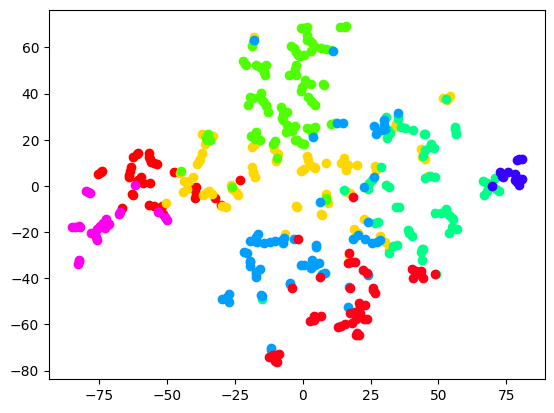

In [ ]:


for i in range(8):
  A = np.where(kmeans==i)
  plt.scatter(X_embedded[A,0], X_embedded[A,1], c=cmap(i))

plt.show()

## D1 with uniform sampling

number of videos: 435
number of clips per video: 5
number of features per clip:  (1024,)


<ipython-input-22-6960c886356a>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_embedded[A,0], X_embedded[A,1], c=cmap(i))


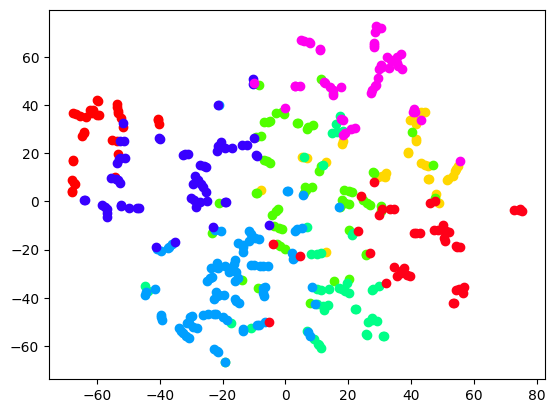

In [ ]:
feat = pd.read_pickle('/content/drive/MyDrive/project/mldl23-ego/saved_features/D1_uniform_D1_test.pkl')
print('number of videos: {}'.format(len((feat['features']))))
print('number of clips per video: {}'.format(len(feat['features'][0]['features_RGB'])))
print('number of features per clip: ',(feat['features'][0]['features_RGB'][0].shape))

mid_clip_feat = np.array([ feat['features'][i]['features_RGB'][2] for i in range(len(feat['features'])) ])

kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit_predict(mid_clip_feat)

pca = PCA(n_components=50)
mid_clip_feat_pca = pca.fit_transform(mid_clip_feat)


X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(mid_clip_feat_pca)

for i in range(8):
  A = np.where(kmeans==i)
  plt.scatter(X_embedded[A,0], X_embedded[A,1], c=cmap(i))

plt.show()

# 5.Classifier MLP

# 6.classifier lstm

In [9]:
os.chdir('/content/drive/MyDrive/project/mldl23-ego')



In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D1-D1 \
dataset.RGB.features_name=Uniform1\
# /content/drive/MyDrive/project/mldl23-ego/Experiment_logs/test/Dec08_17-10-36


Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D1-D1 \
dataset.RGB.features_name=Uniform1_10\

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D1-D1 \
dataset.RGB.features_name=Uniform1_16\

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D1-D1 \
dataset.RGB.features_name=Dense1\
# /content/drive/MyDrive/project/mldl23-ego/Experiment_logs/test/Dec08_17-57-59

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D1-D1 \
dataset.RGB.features_name=Dense1_10\

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D1-D1 \
dataset.RGB.features_name=Dense1_16\

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D2-D2 \
dataset.RGB.features_name=Uniform2\

Streaming output truncated to the last 5000 lines.
2023-12-08 19:18:07 LOG INFO [259/5000]	last Verb loss: 0.4258	Mean verb loss: 0.4372	Acc@1: 31.25%	AccMean@1: 25.00%
2023-12-08 19:18:07 LOG INFO Iteration 1036/20000 batch retrieved! Elapsed time = 0.0 m 0.000255 s
2023-12-08 19:18:11 LOG INFO Iteration 1037/20000 batch retrieved! Elapsed time = 0.0 m 3.796775 s
2023-12-08 19:18:12 LOG INFO Iteration 1038/20000 batch retrieved! Elapsed time = 0.0 m 0.689116 s
2023-12-08 19:18:12 LOG INFO Iteration 1039/20000 batch retrieved! Elapsed time = 0.0 m 0.00133 s
2023-12-08 19:18:12 LOG INFO [260/5000]	last Verb loss: 0.3623	Mean verb loss: 0.4043	Acc@1: 50.00%	AccMean@1: 35.94%
2023-12-08 19:18:12 LOG INFO Iteration 1040/20000 batch retrieved! Elapsed time = 0.0 m 0.010942 s
2023-12-08 19:18:14 LOG INFO Iteration 1041/20000 batch retrieved! Elapsed time = 0.0 m 2.380301 s
2023-12-08 19:18:15 LOG INFO Iteration 1042/20000 batch retrieved! Elapsed time = 0.0 m 0.876756 s
2023-12-08 19:18:15 L

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-845f41cd36fe>", line 1, in <cell line: 1>
    get_ipython().run_cell_magic('bash', '', '\n/content/my_env/bin/python  train_classifier.py \\\nclassifier_name=lstm \\\nsplit=train \\\ndataset.shift=D2-D2 \\\ndataset.RGB.features_name=Uniform2\\\n')
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_shell.py", line 334, in run_cell_magic
    return super().run_cell_magic(magic_name, line, cell)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2473, in run_cell_magic
    result = fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/script.py", line 142, in named_script_magic
    return self.shebang(line, cell)
  File "<decorator-gen-103>", line 2, in shebang
  File "/usr/local/lib/python3

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-845f41cd36fe>", line 1, in <cell line: 1>
    get_ipython().run_cell_magic('bash', '', '\n/content/my_env/bin/python  train_classifier.py \\\nclassifier_name=lstm \\\nsplit=train \\\ndataset.shift=D2-D2 \\\ndataset.RGB.features_name=Uniform2\\\n')
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_shell.py", line 334, in run_cell_magic
    return super().run_cell_magic(magic_name, line, cell)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2473, in run_cell_magic
    result = fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/script.py", line 142, in named_script_magic
    return self.shebang(line, cell)
  File "<decorator-gen-103>", line 2, in shebang
  File "/usr/local/lib/python3

In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D2-D2 \
dataset.RGB.features_name=Uniform2_10\

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D2-D2 \
dataset.RGB.features_name=Uniform2_16\

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D2-D2 \
dataset.RGB.features_name=Dense2 \

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D2-D2 \
dataset.RGB.features_name=Dense2_16 \

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D2-D2 \
dataset.RGB.features_name=Dense2_10 \

Process is terminated.


In [ ]:
! ls

action		    Experiment_logs	   README.md	      save_feat.py	   utils
action-net	    model_for_signal_spec  requirements.yaml  tasks		   z_pr2.py
colab_runner.ipynb  models		   requirments.txt    TEST_RESULTS	   z_pr.py
configs		    other_info		   saved_features     train_classifier.py
ek_data		    pretrained_i3d	   saved_models       train_val


In [13]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D3-D3 \
dataset.RGB.features_name=Uniform3 \


 
 
 
       uid                                       features_RGB  ...      verb verb_class
488  24783  [[0.034004677, 0.50868946, 0.2516936, 0.043029...  ...  put-down          1

[1 rows x 11 columns]

 
 
 
        uid                                       features_RGB  ...      verb verb_class
2869  27697  [[0.11485762, 0.52729124, 0.46834072, 0.507492...  ...  put-down          1

[1 rows x 11 columns]

 
 
 
        uid                                       features_RGB  ...   verb verb_class
1712  26265  [[0.04495111, 0.2179001, 0.13312088, 0.0818724...  ...  rinse          4

[1 rows x 11 columns]

 
 
 
        uid                                       features_RGB  ...  verb verb_class
1147  25575  [[0.2516389, 0.1840621, 0.17916349, 0.23251665...  ...  stir          6

[1 rows x 11 columns]

 
 
 
        uid                                       features_RGB  ...     verb verb_class
1003  25407  [[0.10626771, 0.31765598, 0.61854744, 0.073680...  ...  pick-up          0



2024-01-19 12:14:57 LOG INFO Running with parameters: 
  action: train
  name: test
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: None
  models_dir: saved_models/test/Jan19_12-14-54
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D3-D3
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: /content/drive/MyDrive/project/ek_data/frames
      tmpl: img_{:010d}.jpg
      features_name: Uniform3
    Event:
      rgb4e: 6
  models:
    RGB:
      model: Classifier
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
  wandb_dir: 
  classifier_name: lstm
  split: train
  ex

CalledProcessError: Command 'b'\n/content/my_env/bin/python  train_classifier.py \\\nclassifier_name=lstm \\\nsplit=train \\\ndataset.shift=D3-D3 \\\ndataset.RGB.features_name=Uniform3 \\\n'' returned non-zero exit status 1.

In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D3-D3 \
dataset.RGB.features_name=Dense3\

In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D3-D3 \
dataset.RGB.features_name=Uniform3_10 \

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D3-D3 \
dataset.RGB.features_name=Dense3_10 \

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D3-D3 \
dataset.RGB.features_name=Uniform3_16 \

Process is terminated.


In [ ]:
%%bash

/content/my_env/bin/python  train_classifier.py \
classifier_name=lstm \
split=train \
dataset.shift=D3-D3 \
dataset.RGB.features_name=Dense3_16 \

Process is terminated.
